In [1]:
###source = https://www.youtube.com/watch?v=zp8clK9yCro&t=420s


from this import d
from turtle import forward
from matplotlib import pyplot as plt
from matplotlib.transforms import Transform
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

transform = transforms.ToTensor()


mnist_data = datasets.MNIST(root='./data', download=True, transform=transform)
data_loader = torch.utils.data.DataLoader(
    dataset=mnist_data, batch_size=64, shuffle=True)

dataiter = iter(data_loader)
images, labels = dataiter.next()


class Autoencodeur(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(nn.Linear(28*28, 128), nn.ReLU(), nn.Linear(
            128, 64), nn.ReLU(), nn.Linear(64, 12), nn.ReLU(), nn.Linear(12, 3))
        self.decodeur = nn.Sequential(nn.Linear(3, 12), nn.ReLU(), nn.Linear(
            12, 64), nn.ReLU(), nn.Linear(64, 128), nn.ReLU(), nn.Linear(128, 28*28), nn.Sigmoid())

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decodeur(encoded)
        return decoded


model = Autoencodeur()
criteron = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-2, weight_decay=1e-5)

num_epochs = 10
outputs = []
for epoch in range(num_epochs):
    for (img, _) in data_loader:
        img = img.reshape(-1, 28*28)
        recon = model(img)
        loss = criteron(recon, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch: {epoch+1}, Loss: {loss.item() : 4f}')
    outputs.append((epoch, img, recon))

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
Epoch: 1, Loss:  0.039384
Epoch: 2, Loss:  0.042064
Epoch: 3, Loss:  0.041606
Epoch: 4, Loss:  0.037692
Epoch: 5, Loss:  0.037769
Epoch: 6, Los

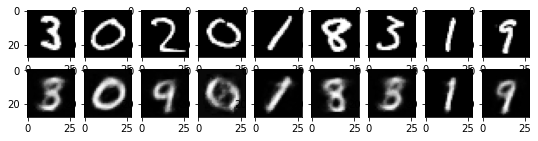

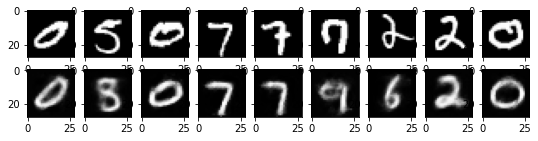

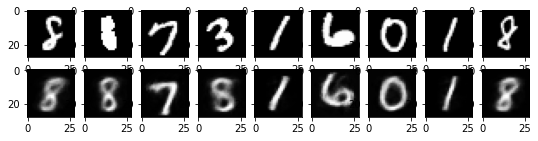

In [2]:

for k in range(0, num_epochs, 4):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9:
            break
        plt.subplot(2, 9, i+1)
        item = item.reshape(-1, 28, 28)
        plt.imshow(item[0])

    for i, item in enumerate(recon):
        if i >= 9:
            break
        plt.subplot(2, 9, 9+i+1)
        item = item.reshape(-1, 28, 28)
        plt.imshow(item[0])


plt.show()
